In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Path ke file zip dataset
zip_path = '/content/drive/My Drive/mybatik.zip'

# Ekstrak dataset
extract_path = '/content/mybatik'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to {extract_path}")


Dataset extracted to /content/mybatik


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformasi data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset
data_dir = '/content/mybatik'
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Split dataset menjadi train dan test
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Classes Name:")
for class_name in dataset.classes:
    print(class_name)

Classes Name:
batik-bali
batik-betawi
batik-celup
batik-cendrawasih
batik-ceplok
batik-ciamis
batik-garutan
batik-gentongan
batik-ikat-sanggar-jumputan-maharani
batik-kawung
batik-keraton
batik-lasem
batik-megamendung
batik-parang
batik-pekalongan
batik-priangan
batik-sekar
batik-sidoluhur
batik-sidomukti
batik-sogan
batik-tambal


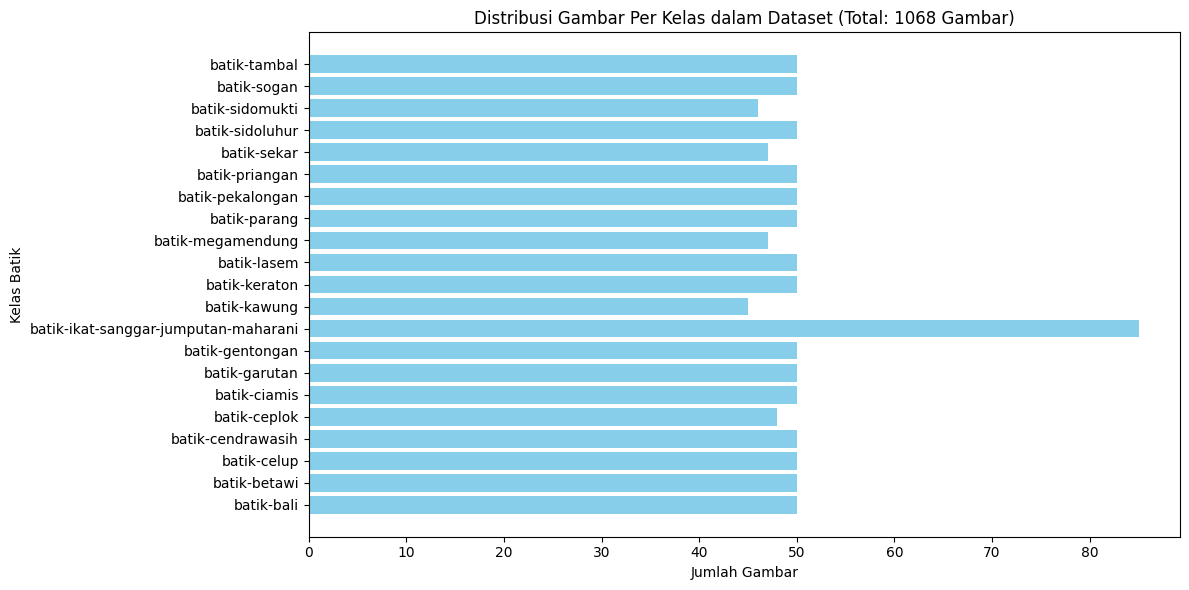

Jumlah Gambar Per Kelas Batik:
batik-bali: 50 gambar
batik-betawi: 50 gambar
batik-celup: 50 gambar
batik-cendrawasih: 50 gambar
batik-ceplok: 48 gambar
batik-ciamis: 50 gambar
batik-garutan: 50 gambar
batik-gentongan: 50 gambar
batik-ikat-sanggar-jumputan-maharani: 85 gambar
batik-kawung: 45 gambar
batik-keraton: 50 gambar
batik-lasem: 50 gambar
batik-megamendung: 47 gambar
batik-parang: 50 gambar
batik-pekalongan: 50 gambar
batik-priangan: 50 gambar
batik-sekar: 47 gambar
batik-sidoluhur: 50 gambar
batik-sidomukti: 46 gambar
batik-sogan: 50 gambar
batik-tambal: 50 gambar

Total Jumlah Gambar: 1068 gambar


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Hitung jumlah gambar per kelas
class_counts = Counter([dataset.classes[label] for _, label in dataset.imgs])

# Data untuk diagram
labels = list(class_counts.keys())
counts = list(class_counts.values())
total_images = sum(counts)  # Total jumlah gambar

# Plot diagram batang
plt.figure(figsize=(12, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel('Jumlah Gambar')
plt.ylabel('Kelas Batik')
plt.title(f'Distribusi Gambar Per Kelas dalam Dataset (Total: {total_images} Gambar)')
plt.tight_layout()
plt.show()

# Tampilkan jumlah gambar per kelas dalam bentuk teks
print("Jumlah Gambar Per Kelas Batik:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} gambar")

# Total gambar
print(f"\nTotal Jumlah Gambar: {total_images} gambar")



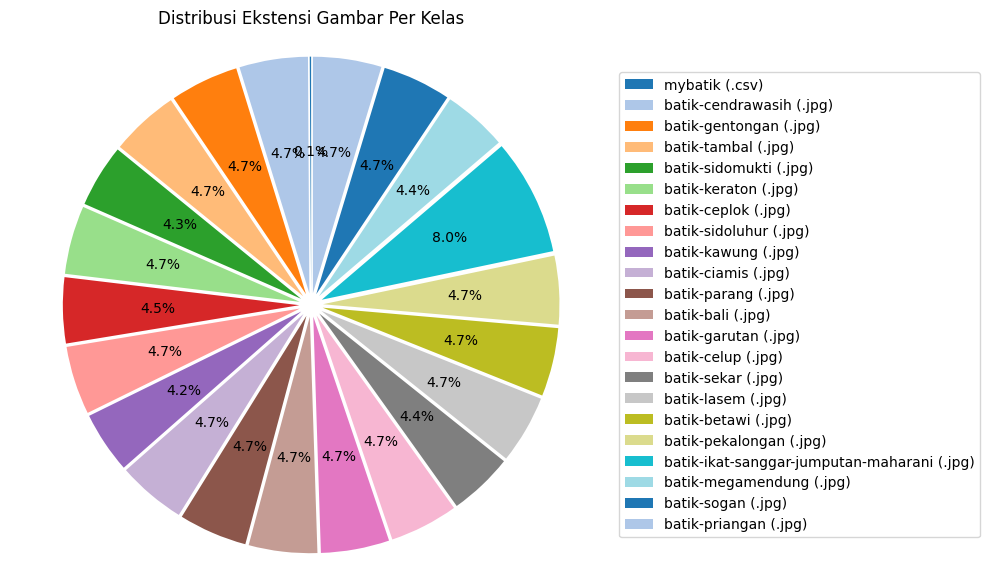

In [ ]:
import matplotlib.pyplot as plt
import os
from collections import defaultdict

# Hitung jumlah gambar per kelas dan ekstensi
class_extensions = defaultdict(lambda: defaultdict(int))

data_dir = '/content/mybatik'

for root, _, files in os.walk(data_dir):
    for file in files:
        class_name = os.path.basename(root)
        ext = os.path.splitext(file)[1].lower()
        class_extensions[class_name][ext] += 1

# Gabungan data semua kelas dengan ekstensi
class_extension_totals = {}
for class_name, extensions in class_extensions.items():
    for ext, count in extensions.items():
        key = f"{class_name} ({ext})"
        class_extension_totals[key] = count

# Data untuk diagram
labels = list(class_extension_totals.keys())
sizes = list(class_extension_totals.values())
colors = plt.cm.tab20.colors[:len(labels)]

plt.figure(figsize=(10, 6))

# Explode untuk memisahkan beberapa irisan
explode = [0.05] * len(labels)

plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Distribusi Ekstensi Gambar Per Kelas", fontsize=12)
plt.axis('equal')

plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Tampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import os
from collections import defaultdict

# Dictionary untuk menyimpan resolusi setiap kelas
class_resolutions = defaultdict(list)

# Proses setiap gambar
dataset_dir = '/content/mybatik'
for root, _, files in os.walk(dataset_dir):
    class_name = os.path.basename(root)
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                class_resolutions[class_name].append((file, (width, height)))
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

# Menampilkan semua resolusi per kelas
for class_name, resolutions in class_resolutions.items():
    print(f"\nKelas: {class_name}")
    for file_name, (width, height) in resolutions:
        print(f"  {file_name}: {width}x{height}")


Error processing file /content/mybatik/WA_Fn-UseC_-Telco-Customer-Churn.csv: cannot identify image file '/content/mybatik/WA_Fn-UseC_-Telco-Customer-Churn.csv'
Error processing file /content/mybatik/batik-cendrawasih/18.jpg: cannot identify image file '/content/mybatik/batik-cendrawasih/18.jpg'
Error processing file /content/mybatik/batik-megamendung/49.jpg: cannot identify image file '/content/mybatik/batik-megamendung/49.jpg'

Kelas: batik-cendrawasih
  8.jpg: 512x512
  14.jpg: 1000x1000
  2.jpg: 350x467
  32.jpg: 736x919
  39.jpg: 1920x1920
  50.jpg: 600x600
  33.jpg: 300x262
  13.jpg: 300x300
  48.jpg: 306x261
  46.jpg: 1000x1333
  20.jpg: 641x480
  9.jpg: 450x600
  44.jpg: 400x600
  43.jpg: 875x563
  34.jpg: 2500x2500
  16.jpg: 350x467
  47.jpg: 641x344
  45.jpg: 900x900
  31.jpg: 683x1025
  24.jpg: 1600x1200
  49.jpg: 700x400
  17.jpg: 1000x1500
  12.jpg: 639x479
  15.jpg: 320x360
  30.jpg: 683x1025
  7.jpg: 1000x1500
  37.jpg: 350x467
  10.jpg: 300x227
  41.jpg: 700x933
  28.jpg

Mengumpulkan resolusi gambar...
Error processing file /content/mybatik/WA_Fn-UseC_-Telco-Customer-Churn.csv: cannot identify image file '/content/mybatik/WA_Fn-UseC_-Telco-Customer-Churn.csv'
Error processing file /content/mybatik/batik-cendrawasih/18.jpg: cannot identify image file '/content/mybatik/batik-cendrawasih/18.jpg'
Error processing file /content/mybatik/batik-megamendung/49.jpg: cannot identify image file '/content/mybatik/batik-megamendung/49.jpg'
Menyiapkan data untuk heatmap...
Membuat heatmap...


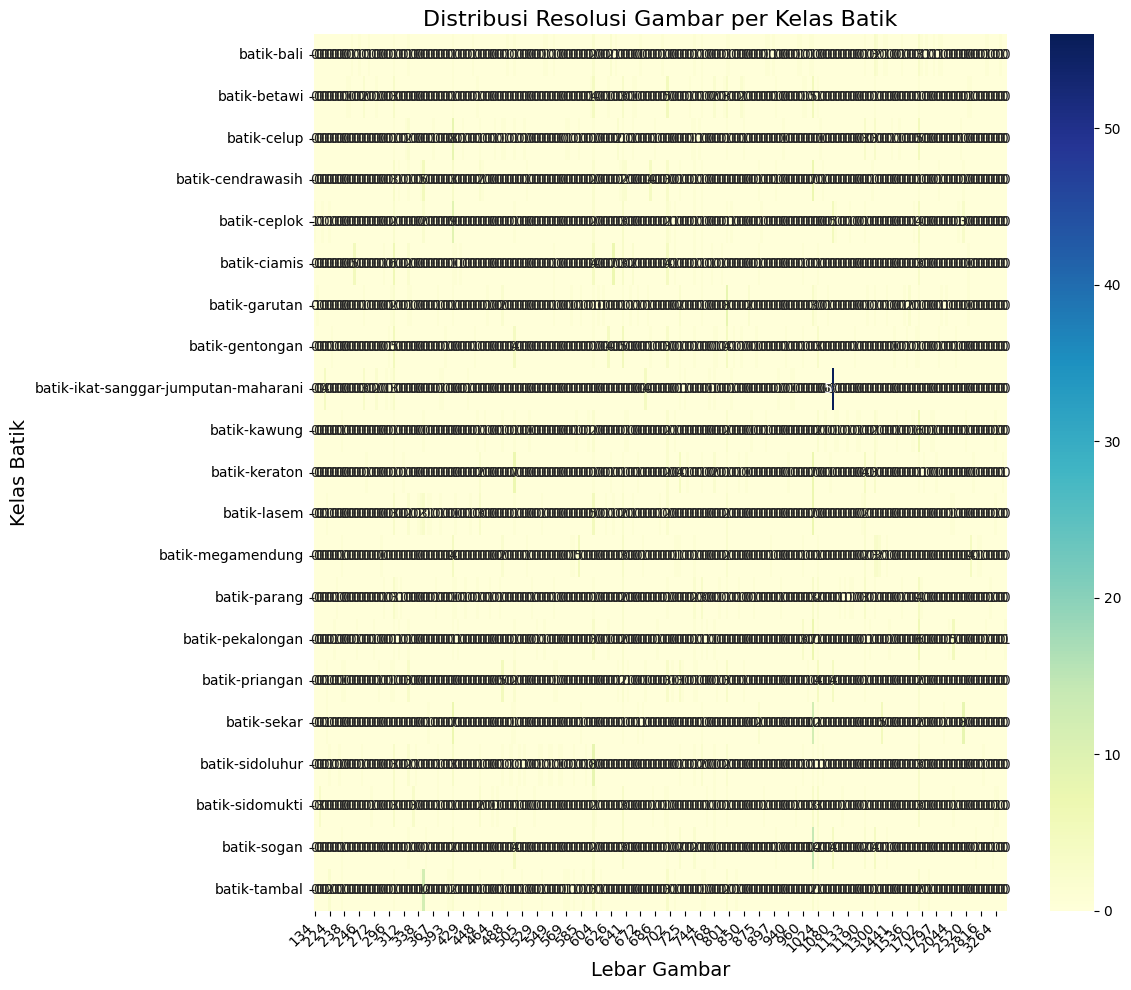

Heatmap ditampilkan!


In [ ]:
!pip install seaborn matplotlib pandas


# Import library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
from collections import defaultdict

# 1. Mengumpulkan Resolusi Gambar
print("Mengumpulkan resolusi gambar...")
class_resolutions = defaultdict(list)
dataset_dir = '/content/mybatik'

for root, _, files in os.walk(dataset_dir):
    class_name = os.path.basename(root)
    for file in files:
        file_path = os.path.join(root, file)
        try:
            with Image.open(file_path) as img:
                width, height = img.size
                class_resolutions[class_name].append((width, height))
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

# 2. Menyiapkan Data untuk Heatmap
print("Menyiapkan data untuk heatmap...")
data = []
for class_name, resolutions in class_resolutions.items():
    for width, height in resolutions:
        data.append([class_name, width, height])

df = pd.DataFrame(data, columns=['Kelas', 'Lebar', 'Tinggi'])

# 3. Membuat Heatmap
print("Membuat heatmap...")
plt.figure(figsize=(12, 10))
heatmap_data = df.pivot_table(index='Kelas', columns='Lebar', values='Tinggi', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribusi Resolusi Gambar per Kelas Batik", fontsize=16)
plt.xlabel("Lebar Gambar", fontsize=14)
plt.ylabel("Kelas Batik", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Heatmap ditampilkan!")

In [ ]:
# Menampilkan resolusi tertinggi dan terendah per kelas
for class_name, resolutions in class_resolutions.items():
    if resolutions:
        max_res = max(resolutions, key=lambda x: x[1][0] * x[1][1])  # Berdasarkan area (width * height)
        min_res = min(resolutions, key=lambda x: x[1][0] * x[1][1])
        print(f"\nKelas: {class_name}")
        print(f"  Resolusi Tertinggi: {max_res[0]} - {max_res[1][0]}x{max_res[1][1]}")
        print(f"  Resolusi Terendah: {min_res[0]} - {min_res[1][0]}x{min_res[1][1]}")
    else:
        print(f"\nKelas: {class_name} (Tidak ada gambar)")



Kelas: batik-cendrawasih
  Resolusi Tertinggi: 34.jpg - 2500x2500
  Resolusi Terendah: 10.jpg - 300x227

Kelas: batik-gentongan
  Resolusi Tertinggi: 38.jpg - 2160x3240
  Resolusi Terendah: 18.jpg - 300x158

Kelas: batik-tambal
  Resolusi Tertinggi: 12.jpg - 1600x1200
  Resolusi Terendah: 43.jpg - 300x221

Kelas: batik-sidomukti
  Resolusi Tertinggi: 6.jpg - 3264x2448
  Resolusi Terendah: 33.jpg - 160x120

Kelas: batik-keraton
  Resolusi Tertinggi: 39.jpg - 4454x3014
  Resolusi Terendah: 7.jpg - 260x224

Kelas: batik-ceplok
  Resolusi Tertinggi: 43.jpg - 2500x2500
  Resolusi Terendah: 50.jpg - 134x179

Kelas: batik-sidoluhur
  Resolusi Tertinggi: 10.jpg - 2844x2778
  Resolusi Terendah: 2.jpg - 235x214

Kelas: batik-kawung
  Resolusi Tertinggi: 46.jpg - 3264x2448
  Resolusi Terendah: 36.jpg - 236x246

Kelas: batik-ciamis
  Resolusi Tertinggi: 1.jpg - 2536x1572
  Resolusi Terendah: 16.jpg - 300x155

Kelas: batik-parang
  Resolusi Tertinggi: 13.jpg - 3008x2000
  Resolusi Terendah: 50.jpg

In [ ]:
import plotly.graph_objects as go

# Data untuk diagram (diambil dari kode Anda)
class_names = []
max_resolutions = []
min_resolutions = []

for class_name, resolutions in class_resolutions.items():
    if resolutions:
        max_res = max(resolutions, key=lambda x: x[1][0] * x[1][1])
        min_res = min(resolutions, key=lambda x: x[1][0] * x[1][1])

        # Hanya ambil resolusi (width, height)
        class_names.append(class_name)
        max_resolutions.append(max_res[1])
        min_resolutions.append(min_res[1])

# Membuat diagram batang dengan Plotly
fig = go.Figure(data=[
    go.Bar(name='Resolusi Tertinggi', x=class_names, y=[res[0] * res[1] for res in max_resolutions]),
    go.Bar(name='Resolusi Terendah', x=class_names, y=[res[0] * res[1] for res in min_resolutions])
])

fig.update_layout(barmode='group', title_text='Resolusi Gambar per Kelas',
                  xaxis_title='Kelas Batik', yaxis_title='Resolusi (Area)')

# Menampilkan diagram
fig.show()

In [ ]:
from PIL import Image
import os

def clean_dataset(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Coba buka file sebagai gambar
                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                print(f"Removing invalid file: {file_path}")
                os.remove(file_path)

# Jalankan pembersihan dataset
clean_dataset('/content/mybatik')


Removing invalid file: /content/mybatik/WA_Fn-UseC_-Telco-Customer-Churn.csv
Removing invalid file: /content/mybatik/batik-megamendung/49.jpg
Removing invalid file: /content/mybatik/batik-cendrawasih/18.jpg


In [ ]:
import os

def count_files(directory):
    total_files = 0
    for _, _, files in os.walk(directory):
        total_files += len(files)
    return total_files

cleaned_file_count = count_files('/content/mybatik')
print(f"Jumlah file setelah pembersihan: {cleaned_file_count}")


Jumlah file setelah pembersihan: 1066


In [ ]:
# Reload dataset setelah pembersihan
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Split dataset menjadi train dan test ulang
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Buat ulang DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Dataset refreshed. Total images: {len(dataset)}")


Dataset refreshed. Total images: 1066


In [ ]:
for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if not os.path.exists(file_path):
            print(f"Missing file: {file_path}")


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformasi data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load dataset ulang setelah pembersihan
data_dir = '/content/mybatik'
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Periksa ulang jumlah data
print(f"Number of images: {len(dataset)}")
print(f"Classes: {dataset.classes}")


Number of images: 1066
Classes: ['batik-bali', 'batik-betawi', 'batik-celup', 'batik-cendrawasih', 'batik-ceplok', 'batik-ciamis', 'batik-garutan', 'batik-gentongan', 'batik-ikat-sanggar-jumputan-maharani', 'batik-kawung', 'batik-keraton', 'batik-lasem', 'batik-megamendung', 'batik-parang', 'batik-pekalongan', 'batik-priangan', 'batik-sekar', 'batik-sidoluhur', 'batik-sidomukti', 'batik-sogan', 'batik-tambal']


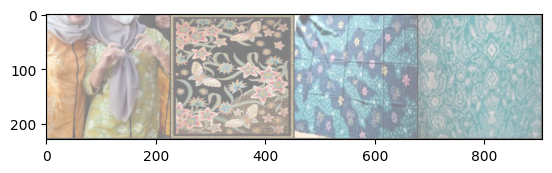

batik-ikat-sanggar-jumputan-maharani batik-pekalongan batik-ikat-sanggar-jumputan-maharani batik-sidomukti


In [ ]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Denormalisasi
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Ambil beberapa batch data
dataiter = iter(DataLoader(dataset, batch_size=4, shuffle=True))
images, labels = next(dataiter)

# Tampilkan gambar
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{dataset.classes[labels[j]]}' for j in range(len(labels))))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.models import ResNet18_Weights

# Load model pretrained
weights = ResNet18_Weights.IMAGENET1K_V1
model = models.resnet18(weights=weights)

# Sesuai jumlah kelas
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Pindahkan ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Mengatur device untuk menggunakan GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformasi gambar agar cocok untuk model
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset training dari Google Drive atau lokal
train_dataset = datasets.ImageFolder(root='/content/mybatik', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"Dataset training memiliki {len(train_dataset)} gambar")


Dataset training memiliki 1066 gambar


In [ ]:
train_accuracies = []
train_losses = []

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Hitung akurasi
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch 1/20, Loss: 0.4935, Accuracy: 85.74%
Epoch 2/20, Loss: 0.3665, Accuracy: 89.21%
Epoch 3/20, Loss: 0.2699, Accuracy: 91.28%
Epoch 4/20, Loss: 0.2629, Accuracy: 91.74%
Epoch 5/20, Loss: 0.2157, Accuracy: 92.40%
Epoch 6/20, Loss: 0.1472, Accuracy: 94.28%
Epoch 7/20, Loss: 0.1323, Accuracy: 94.47%
Epoch 8/20, Loss: 0.1385, Accuracy: 94.75%
Epoch 9/20, Loss: 0.2328, Accuracy: 91.93%
Epoch 10/20, Loss: 0.2600, Accuracy: 91.56%
Epoch 11/20, Loss: 0.2931, Accuracy: 90.15%
Epoch 12/20, Loss: 0.3948, Accuracy: 88.27%
Epoch 13/20, Loss: 0.4108, Accuracy: 87.05%
Epoch 14/20, Loss: 0.3881, Accuracy: 88.27%
Epoch 15/20, Loss: 0.3167, Accuracy: 89.21%
Epoch 16/20, Loss: 0.2611, Accuracy: 91.46%
Epoch 17/20, Loss: 0.2099, Accuracy: 91.37%
Epoch 18/20, Loss: 0.1364, Accuracy: 94.28%
Epoch 19/20, Loss: 0.1173, Accuracy: 95.31%
Epoch 20/20, Loss: 0.1005, Accuracy: 95.03%


In [ ]:
print("\nTraining Accuracy per Epoch:")
for epoch, accuracy in enumerate(train_accuracies):
    print(f"Epoch {epoch+1}: {accuracy:.2f}%")

print(f"\nFinal Training Accuracy: {train_accuracies[-1]:.2f}%")


Training Accuracy per Epoch:
Epoch 1: 85.74%
Epoch 2: 89.21%
Epoch 3: 91.28%
Epoch 4: 91.74%
Epoch 5: 92.40%
Epoch 6: 94.28%
Epoch 7: 94.47%
Epoch 8: 94.75%
Epoch 9: 91.93%
Epoch 10: 91.56%
Epoch 11: 90.15%
Epoch 12: 88.27%
Epoch 13: 87.05%
Epoch 14: 88.27%
Epoch 15: 89.21%
Epoch 16: 91.46%
Epoch 17: 91.37%
Epoch 18: 94.28%
Epoch 19: 95.31%
Epoch 20: 95.03%

Final Training Accuracy: 95.03%


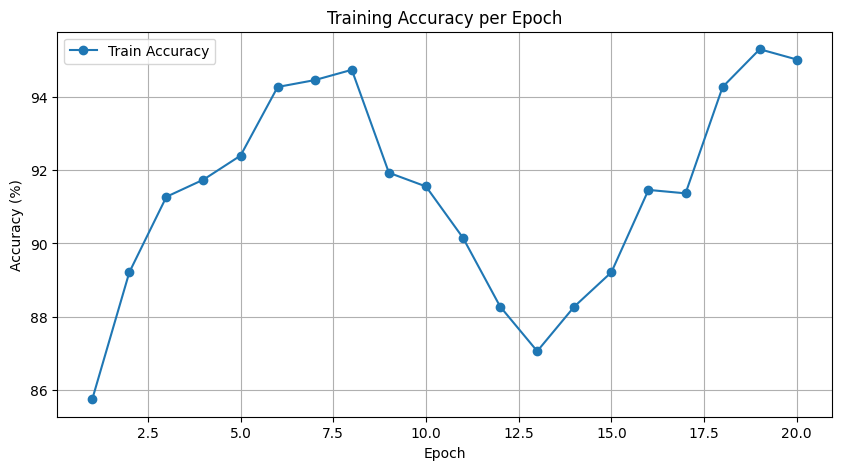

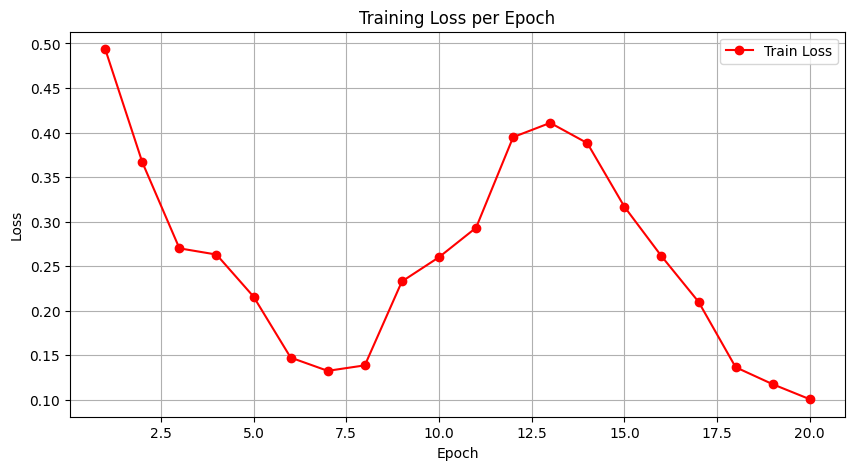

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy', marker='o')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid()
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red', marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
from google.colab import files


# Transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
from google.colab import files

# Fungsi untuk preprocessing gambar agar cocok untuk model
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0)

# Fungsi untuk membuat prediksi
def predict_image(model, image_path):
    model.eval()
    image = preprocess_image(image_path).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)

    class_index = predicted.item()
    print(f"Predicted class: {dataset.classes[class_index]}")

# Mengunggah gambar dari lokal
uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Processing {filename}")
    predict_image(model, filename)


Saving 4.jpg to 4.jpg
Processing 4.jpg
Predicted class: batik-ikat-sanggar-jumputan-maharani


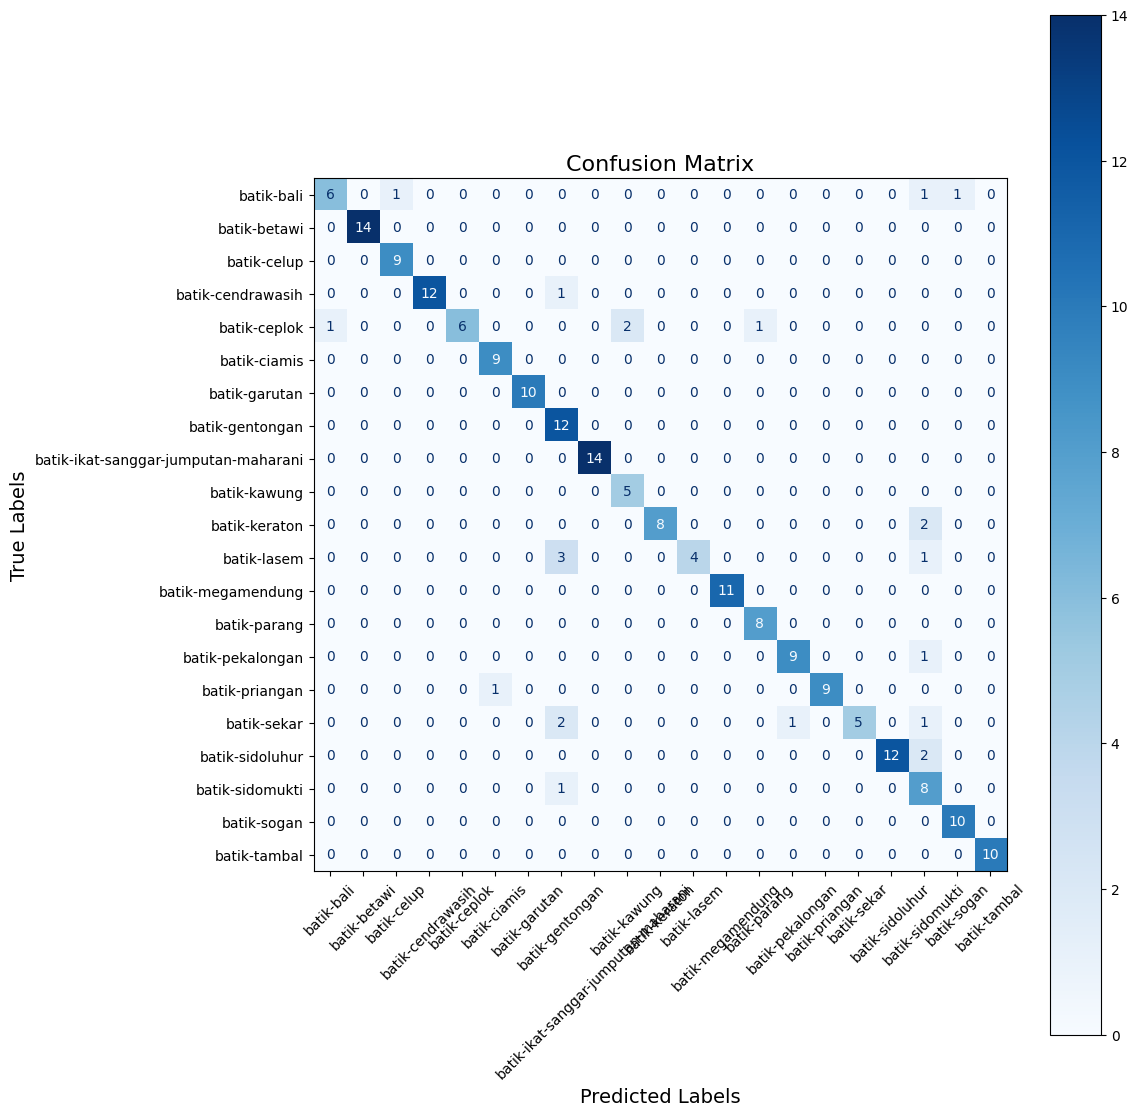

Accuracy: 0.8925
Precision: 0.9241
Recall: 0.8925
F1 Score: 0.8930

Classification Report:
                                      precision    recall  f1-score   support

                          batik-bali       0.86      0.67      0.75         9
                        batik-betawi       1.00      1.00      1.00        14
                         batik-celup       0.90      1.00      0.95         9
                   batik-cendrawasih       1.00      0.92      0.96        13
                        batik-ceplok       1.00      0.60      0.75        10
                        batik-ciamis       0.90      1.00      0.95         9
                       batik-garutan       1.00      1.00      1.00        10
                     batik-gentongan       0.63      1.00      0.77        12
batik-ikat-sanggar-jumputan-maharani       1.00      1.00      1.00        14
                        batik-kawung       0.71      1.00      0.83         5
                       batik-keraton       1.00   

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluasi dengan data test
all_labels = []
all_preds = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.classes)

# Customisasi tampilan confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))  # Atur ukuran plot
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)

# Tambahkan judul dan label
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)

# Tampilkan confusion matrix
plt.tight_layout()  # Pastikan label tidak terpotong
plt.show()

# Metrik Evaluasi
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Laporan Klasifikasi
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=dataset.classes))


In [ ]:
save_path = "/content/drive/My Drive/best_model_cnn.pth"
torch.save(model.state_dict(), save_path)
print(f"Model disimpan di {save_path}")


Model disimpan di /content/drive/My Drive/best_model_cnn.pth
